In [1]:
import pandas as pd
import numpy as np
import seaborn as sns


In [2]:
df=sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
df.groupby('sex')[['total_bill']].mean()

,total_bill
sex,
Male,20.744076
Female,18.056897


In [4]:
df.groupby(['sex','smoker'])[['total_bill']].mean().unstack()

total_bill           
smoker        Yes         No
sex                         
Male    22.284500  19.791237
Female  17.977879  18.105185

In [5]:
df.pivot_table(index='sex',columns='smoker',values='total_bill')

smoker,Yes,No
sex,,
Male,22.284500,19.791237
Female,17.977879,18.105185


In [6]:
#aggfunc
df.pivot_table(index='sex',columns='smoker',values='total_bill',aggfunc='sum')

smoker,Yes,No
sex,,
Male,1337.07,1919.75
Female,593.27,977.68


In [7]:
#all cols together
df.pivot_table(index='sex',columns='smoker')

C:\Users\sahil rajput\AppData\Local\Temp\ipykernel_12720\2734673648.py:2: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  df.pivot_table(index='sex',columns='smoker')


size                 tip           total_bill           
smoker       Yes        No       Yes        No        Yes         No
sex                                                                 
Male    2.500000  2.711340  3.051167  3.113402  22.284500  19.791237
Female  2.242424  2.592593  2.931515  2.773519  17.977879  18.105185

In [8]:
#multidimensional
df.pivot_table(index=['sex','smoker'],columns=['day','time'],aggfunc={'size':'mean','tip':'max','total_bill':'sum'})

size                                               tip  \
day                Thur              Fri              Sat       Sun  Thur   
time              Lunch Dinner     Lunch Dinner    Dinner    Dinner Lunch   
sex    smoker                                                               
Male   Yes     2.300000    NaN  1.666667    2.4  2.629630  2.600000  5.00   
       No      2.500000    NaN       NaN    2.0  2.656250  2.883721  6.70   
Female Yes     2.428571    NaN  2.000000    2.0  2.200000  2.500000  5.00   
       No      2.500000    2.0  3.000000    2.0  2.307692  3.071429  5.17   

                                                total_bill                \
day                    Fri           Sat    Sun       Thur           Fri   
time          Dinner Lunch Dinner Dinner Dinner      Lunch Dinner  Lunch   
sex    smoker                                                              
Male   Yes       NaN  2.20   4.73  10.00    6.5     191.71   0.00  34.16   
       No        NaN   NaN   3.50   9.00    6.0     369.73   0.00   0.00   
Female Yes       NaN  3.48   4.30   6.50    4.0     134.53   0.00  39.78   
       No        3.0  3.00   3.25   4.67    5.2     381.58  18.78  15.98   

                                                   
day                     Sat           Sun          
time           Dinner Lunch  Dinner Lunch  Dinner  
sex    smoker                                      
Male   Yes     129.46   0.0  589.62   0.0  392.12  
       No       34.95   0.0  637.73   0.0  877.34  
Female Yes      48.80   0.0  304.00   0.0   66.16  
       No       22.75   0.0  247.05   0.0  291.54

In [9]:
#margins
df.pivot_table(index='sex',columns='smoker',values='total_bill',aggfunc='sum',margins=True)

smoker,Yes,No,All
sex,,,
Male,1337.07,1919.75,3256.82
Female,593.27,977.68,1570.95
All,1930.34,2897.43,4827.77


In [10]:
#plotting graphs
df=pd.read_csv("expense_data.csv")
df['Category'].value_counts()

Food                156
Other                60
Transportation       31
Apparel               7
Household             6
Allowance             6
Social Life           5
Education             1
Salary                1
Self-development      1
Beauty                1
Gift                  1
Petty cash            1
Name: Category, dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            277 non-null    object 
 1   Account         277 non-null    object 
 2   Category        277 non-null    object 
 3   Subcategory     0 non-null      float64
 4   Note            273 non-null    object 
 5   INR             277 non-null    float64
 6   Income/Expense  277 non-null    object 
 7   Note.1          0 non-null      float64
 8   Amount          277 non-null    float64
 9   Currency        277 non-null    object 
 10  Account.1       277 non-null    float64
dtypes: float64(5), object(6)
memory usage: 23.9+ KB


In [12]:
df['Date']=pd.to_datetime(df['Date'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            277 non-null    datetime64[ns]
 1   Account         277 non-null    object        
 2   Category        277 non-null    object        
 3   Subcategory     0 non-null      float64       
 4   Note            273 non-null    object        
 5   INR             277 non-null    float64       
 6   Income/Expense  277 non-null    object        
 7   Note.1          0 non-null      float64       
 8   Amount          277 non-null    float64       
 9   Currency        277 non-null    object        
 10  Account.1       277 non-null    float64       
dtypes: datetime64[ns](1), float64(5), object(5)
memory usage: 23.9+ KB


In [14]:
df['month']=df['Date'].dt.month_name()

In [15]:
df.head()

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1,month
0,2022-03-02 10:11:00,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0,March
1,2022-03-02 10:11:00,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0,March
2,2022-03-01 19:50:00,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0,March
3,2022-03-01 18:56:00,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0,March
4,2022-03-01 18:22:00,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0,March


<Axes: xlabel='month'>

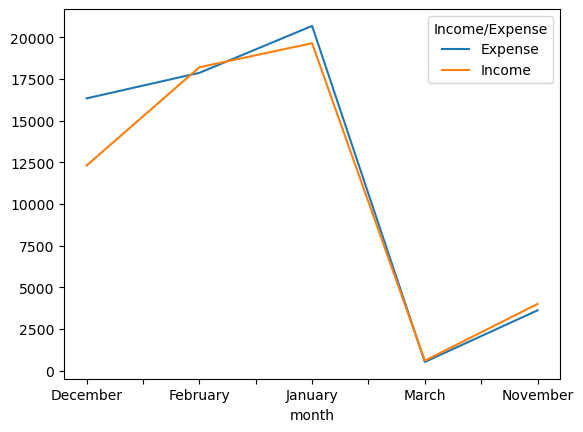

In [16]:
df.pivot_table(index='month',columns='Income/Expense',values='INR',aggfunc='sum',fill_value=0).plot()

<Axes: xlabel='month'>

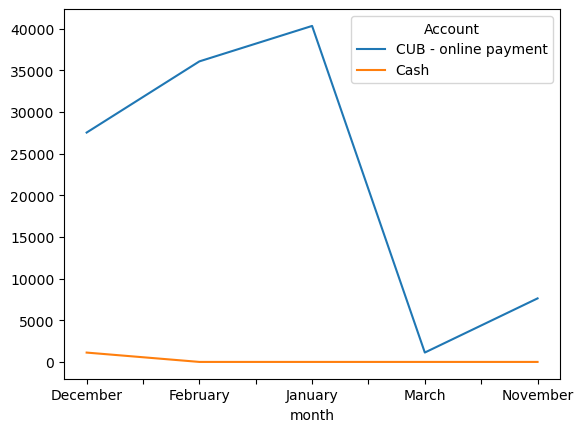

In [17]:
df.pivot_table(index='month',columns='Account',values='INR',aggfunc='sum',fill_value=0).plot()

In [18]:
#____________Strings____________

import pandas as pd
import numpy as np

In [19]:
#What are vectorized operations
a=np.array([1,2,3,4])
a*4

array([ 4,  8, 12, 16])

In [20]:
#problem in vectorized operations in vanilla python
#s=['cat','mat',None,'rat']
#[i.starswith('c')for i in s]
s=pd.Series(['cat','mat',None,'rat'])
s.str.startswith('c')

0     True
1    False
2     None
3    False
dtype: object

In [21]:
#import titanic
df=pd.read_csv('titanic (1).csv')
df['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [22]:
#Common functions
#lower/upper /capitalize/title
df['Name'].str.upper()
df['Name'].str.capitalize()
df['Name'].str.title()
#len
df[df['Name'].str.len()==82].values[0]
#strip
'                        sahil        '.strip()

'sahil'

In [23]:
#split->get
df['lastname']=df['Name'].str.split(',').str.get(0)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,lastname
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen


In [24]:
df[['title','firstname']]=df['Name'].str.split(',').str.get(1).str.strip().str.split(' ',n=1,expand=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,lastname,title,firstname
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr.,Owen Harris
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs.,John Bradley (Florence Briggs Thayer)
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss.,Laina
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs.,Jacques Heath (Lily May Peel)
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr.,William Henry


In [25]:
#replace
df['title']=df['title'].str.replace('Ms.','Miss.')
df['title']=df['title'].str.replace('Mlle.','Miss.')

C:\Users\sahil rajput\AppData\Local\Temp\ipykernel_12720\2046264895.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['title']=df['title'].str.replace('Ms.','Miss.')
C:\Users\sahil rajput\AppData\Local\Temp\ipykernel_12720\2046264895.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['title']=df['title'].str.replace('Mlle.','Miss.')


In [26]:
df['title'].value_counts()

Mr.          517
Miss.        185
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Major.         2
Col.           2
Don.           1
Mme.           1
Lady.          1
Sir.           1
Capt.          1
the            1
Jonkheer.      1
Name: title, dtype: int64

In [27]:
#filtering regex
#startswith/endwith
df[df['firstname'].str.startswith('A')]
#isdigit/isalpha
df[df['firstname'].str.isdigit()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,lastname,title,firstname


In [28]:
#applying regex
#contains
#search john->both case
df[df['firstname'].str.contains("john",case=False)]
#find lastname with start and end char vowel
df[df['lastname'].str.contains('^[aeiouAEIOU].+[aeiouAEIOU]$')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,lastname,title,firstname
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C,Uruchurtu,Don.,Manuel E
49,50,0,3,"Arnold-Franchi, Mrs. Josef (Josefine Franchi)",female,18.0,1,0,349237,17.8000,NaN,S,Arnold-Franchi,Mrs.,Josef (Josefine Franchi)
207,208,1,3,"Albimona, Mr. Nassef Cassem",male,26.0,0,0,2699,18.7875,NaN,C,Albimona,Mr.,Nassef Cassem
210,211,0,3,"Ali, Mr. Ahmed",male,24.0,0,0,SOTON/O.Q. 3101311,7.0500,NaN,S,Ali,Mr.,Ahmed
353,354,0,3,"Arnold-Franchi, Mr. Josef",male,25.0,1,0,349237,17.8000,NaN,S,Arnold-Franchi,Mr.,Josef
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C,Artagaveytia,Mr.,Ramon
518,519,1,2,"Angle, Mrs. William A (Florence ""Mary"" Agnes H...",female,36.0,1,0,226875,26.0000,NaN,S,Angle,Mrs.,"William A (Florence ""Mary"" Agnes Hughes)"
784,785,0,3,"Ali, Mr. William",male,25.0,0,0,SOTON/O.Q. 3101312,7.0500,NaN,S,Ali,Mr.,William
840,841,0,3,"Alhomaki, Mr. Ilmari Rudolf",male,20.0,0,0,SOTON/O2 3101287,7.9250,NaN,S,Alhomaki,Mr.,Ilmari Rudolf


In [29]:
#slicing
df['Name'].str[::2]

0                    Ban,M.Oe ars
1      Cmns r.Jh rde Foec rgsTae)
2                     Hiknn is an
3          Ftel,Ms aqe et Ll a el
4                    Aln r ila er
                  ...            
886                   Mnvl,Rv uzs
887                Gaa,Ms.Mrae dt
888          Jhso,Ms.CteieHln"are
889                   Bh,M.Kr oel
890                    Doe,M.Ptik
Name: Name, Length: 891, dtype: object

In [30]:
# date and time in pandas

import pandas as pd
import numpy as np

In [31]:
#Timestamp Object(time stamp referece particular moments in time - Oct24th,2022 at 7:00pm)
#Creating Timestamp Objects
type(pd.Timestamp('2023/1/5'))

pandas._libs.tslibs.timestamps.Timestamp

In [32]:
#variations
pd.Timestamp('2023-1-5')
pd.Timestamp('2023, 1, 5')

Timestamp('2023-01-05 00:00:00')

In [33]:
#only year
pd.Timestamp('2023')

Timestamp('2023-01-01 00:00:00')

In [34]:
#using text
pd.Timestamp('5th January 2023')

Timestamp('2023-01-05 00:00:00')

In [35]:
#providing time also
pd.Timestamp('5th January 2023 8:23AM ')

Timestamp('2023-01-05 08:23:00')

In [36]:
#using daetime datetime object
import datetime as dt
x=pd.Timestamp(dt.datetime(2023,1,5,9,21,56))


In [37]:
#fetching attributes
x.year
x.month
x.day
x.hour
x.minute
x.second

56

In [38]:
#why separate objects to handle date and time when python alreasy has datetime functionality?

#syntax wise datetime is very convenient
#But the performance takes a hit while working with huge data .List Vs Numpy Array
#The weaknesses of Python's datetime format inspire the NumPy team to add a set of native time series data type to NumPy
#The datetime64 dtype encodes dates as 64-bit integers and thus allows arrays of dates to be represented very compactly.


In [39]:
import numpy as np
date =np.array('2015-07-04',dtype=np.datetime64)
date

array('2015-07-04', dtype='datetime64[D]')

In [40]:
date+np.arange(12)

array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
      dtype='datetime64[D]')

In [41]:
#Pandas Timestamp object combines the ease of use of python datetime with the efficient stdsorage and vectorized interface of numpy.datetime64

# DatetimeIndex Objects
A collection of pandas timestamp


In [42]:
#from strings
pd.DatetimeIndex(['2023/1/1','2022/1/1','2021/1/1'])

DatetimeIndex(['2023-01-01', '2022-01-01', '2021-01-01'], dtype='datetime64[ns]', freq=None)

In [43]:
#using python datetime object
pd.DatetimeIndex([dt.datetime(2023,1,1),dt.datetime(2022,1,1),dt.datetime(2021,1,1)])

DatetimeIndex(['2023-01-01', '2022-01-01', '2021-01-01'], dtype='datetime64[ns]', freq=None)

In [44]:
#using pd.timestamps
dt_index=pd.DatetimeIndex([pd.Timestamp(2023,1,1),pd.Timestamp(2022,1,1),pd.Timestamp(2021,1,1)])

In [45]:
#using datetimeIndex as series index
pd.Series([1,2,3],index=dt_index)

2023-01-01    1
2022-01-01    2
2021-01-01    3
dtype: int64

# date_range function

In [46]:
#generate daily dates in a given range
pd.date_range (start='2023/1/5',end='2023/1/31',freq='1D')

DatetimeIndex(['2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08',
               '2023-01-09', '2023-01-10', '2023-01-11', '2023-01-12',
               '2023-01-13', '2023-01-14', '2023-01-15', '2023-01-16',
               '2023-01-17', '2023-01-18', '2023-01-19', '2023-01-20',
               '2023-01-21', '2023-01-22', '2023-01-23', '2023-01-24',
               '2023-01-25', '2023-01-26', '2023-01-27', '2023-01-28',
               '2023-01-29', '2023-01-30', '2023-01-31'],
              dtype='datetime64[ns]', freq='D')

In [47]:
#atrernate days in a given range
pd.date_range (start='2023/1/5',end='2023/1/31',freq='3D')

DatetimeIndex(['2023-01-05', '2023-01-08', '2023-01-11', '2023-01-14',
               '2023-01-17', '2023-01-20', '2023-01-23', '2023-01-26',
               '2023-01-29'],
              dtype='datetime64[ns]', freq='3D')

In [48]:
#B->business days 
pd.date_range (start='2023/1/5',end='2023/1/31',freq='B')

DatetimeIndex(['2023-01-05', '2023-01-06', '2023-01-09', '2023-01-10',
               '2023-01-11', '2023-01-12', '2023-01-13', '2023-01-16',
               '2023-01-17', '2023-01-18', '2023-01-19', '2023-01-20',
               '2023-01-23', '2023-01-24', '2023-01-25', '2023-01-26',
               '2023-01-27', '2023-01-30', '2023-01-31'],
              dtype='datetime64[ns]', freq='B')

In [49]:
#W->one week per day
pd.date_range (start='2023/1/5',end='2023/1/31',freq='W-THU')

DatetimeIndex(['2023-01-05', '2023-01-12', '2023-01-19', '2023-01-26'], dtype='datetime64[ns]', freq='W-THU')

In [50]:
#H-> Hourly data(factor)
pd.date_range (start='2023/1/5',end='2023/1/31',freq='12H')

DatetimeIndex(['2023-01-05 00:00:00', '2023-01-05 12:00:00',
               '2023-01-06 00:00:00', '2023-01-06 12:00:00',
               '2023-01-07 00:00:00', '2023-01-07 12:00:00',
               '2023-01-08 00:00:00', '2023-01-08 12:00:00',
               '2023-01-09 00:00:00', '2023-01-09 12:00:00',
               '2023-01-10 00:00:00', '2023-01-10 12:00:00',
               '2023-01-11 00:00:00', '2023-01-11 12:00:00',
               '2023-01-12 00:00:00', '2023-01-12 12:00:00',
               '2023-01-13 00:00:00', '2023-01-13 12:00:00',
               '2023-01-14 00:00:00', '2023-01-14 12:00:00',
               '2023-01-15 00:00:00', '2023-01-15 12:00:00',
               '2023-01-16 00:00:00', '2023-01-16 12:00:00',
               '2023-01-17 00:00:00', '2023-01-17 12:00:00',
               '2023-01-18 00:00:00', '2023-01-18 12:00:00',
               '2023-01-19 00:00:00', '2023-01-19 12:00:00',
               '2023-01-20 00:00:00', '2023-01-20 12:00:00',
               '2023-01-

In [51]:
#M->Month end 
pd.date_range (start='2023/1/5',end='2023/1/31',freq='M')

DatetimeIndex(['2023-01-31'], dtype='datetime64[ns]', freq='M')

In [52]:
#MS->Month start
pd.date_range (start='2023/1/5',end='2023/2/4',freq='MS')

DatetimeIndex(['2023-02-01'], dtype='datetime64[ns]', freq='MS')

In [53]:
#A->Year end
pd.date_range (start='2023/1/5',end='2030/1/31',freq='Y')

DatetimeIndex(['2023-12-31', '2024-12-31', '2025-12-31', '2026-12-31',
               '2027-12-31', '2028-12-31', '2029-12-31'],
              dtype='datetime64[ns]', freq='A-DEC')

In [54]:
#Using periods (number of results)
pd.date_range (start='2023/1/5',periods=25,freq='H')

DatetimeIndex(['2023-01-05 00:00:00', '2023-01-05 01:00:00',
               '2023-01-05 02:00:00', '2023-01-05 03:00:00',
               '2023-01-05 04:00:00', '2023-01-05 05:00:00',
               '2023-01-05 06:00:00', '2023-01-05 07:00:00',
               '2023-01-05 08:00:00', '2023-01-05 09:00:00',
               '2023-01-05 10:00:00', '2023-01-05 11:00:00',
               '2023-01-05 12:00:00', '2023-01-05 13:00:00',
               '2023-01-05 14:00:00', '2023-01-05 15:00:00',
               '2023-01-05 16:00:00', '2023-01-05 17:00:00',
               '2023-01-05 18:00:00', '2023-01-05 19:00:00',
               '2023-01-05 20:00:00', '2023-01-05 21:00:00',
               '2023-01-05 22:00:00', '2023-01-05 23:00:00',
               '2023-01-06 00:00:00'],
              dtype='datetime64[ns]', freq='H')

# to_datetime function
converts an existing objects to pandas timestamp /datetimeindex object

In [64]:
#simple series example
s=pd.Series(['2023/1/1','2022/1/1','2021/1/1'])
s.str.split('/').str.get(0)
pd.to_datetime(s).dt.year
pd.to_datetime(s).dt.day_name()

0      Sunday
1    Saturday
2      Friday
dtype: object

In [68]:
#with error
s=pd.Series(['2023/1/1','2022/1/1','2021/130/1'])
pd.to_datetime(s,errors='coerce').dt.month_name()

0    January
1    January
2        NaN
dtype: object

In [73]:
df=pd.read_csv('expense_data.csv')
df['Date']=pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            277 non-null    datetime64[ns]
 1   Account         277 non-null    object        
 2   Category        277 non-null    object        
 3   Subcategory     0 non-null      float64       
 4   Note            273 non-null    object        
 5   INR             277 non-null    float64       
 6   Income/Expense  277 non-null    object        
 7   Note.1          0 non-null      float64       
 8   Amount          277 non-null    float64       
 9   Currency        277 non-null    object        
 10  Account.1       277 non-null    float64       
dtypes: datetime64[ns](1), float64(5), object(5)
memory usage: 23.9+ KB


# dt accessor
Accessor object for datetime like properties of the Series values.


In [75]:
df['Date'].dt.month_name()

0         March
1         March
2         March
3         March
4         March
         ...   
272    November
273    November
274    November
275    November
276    November
Name: Date, Length: 277, dtype: object

In [79]:
df['Date'].dt.is_month_end
df['Date'].dt.is_quarter_end

0      False
1      False
2      False
3      False
4      False
       ...  
272    False
273    False
274    False
275    False
276    False
Name: Date, Length: 277, dtype: bool

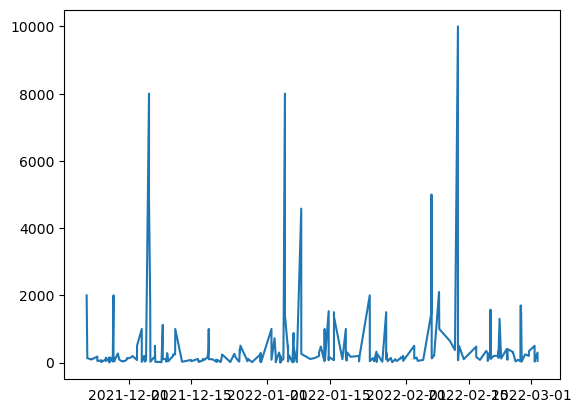

In [82]:
#plot graph
import matplotlib.pyplot as plt
plt.plot(df['Date'],df['INR'])

In [84]:
#day name wise bar chart month wise bar chart 
df['day_name']=df['Date'].dt.day_name()
df.head()

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1,day_name
0,2022-03-02 10:11:00,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0,Wednesday
1,2022-03-02 10:11:00,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0,Wednesday
2,2022-03-01 19:50:00,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0,Tuesday
3,2022-03-01 18:56:00,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0,Tuesday
4,2022-03-01 18:22:00,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0,Tuesday


<Axes: xlabel='day_name'>

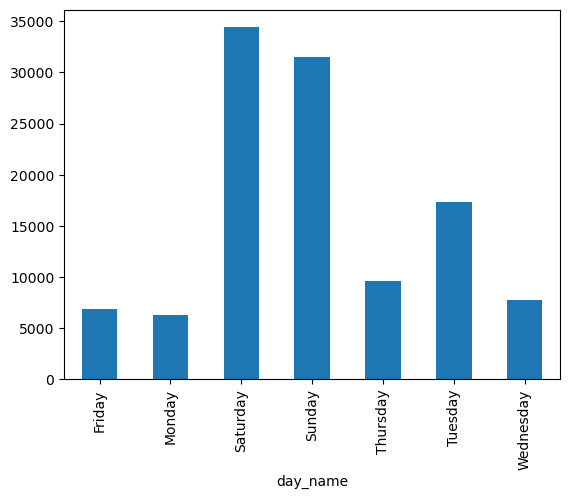

In [86]:
df.groupby('day_name')['INR'].sum().plot(kind='bar')

<Axes: xlabel='month_name'>

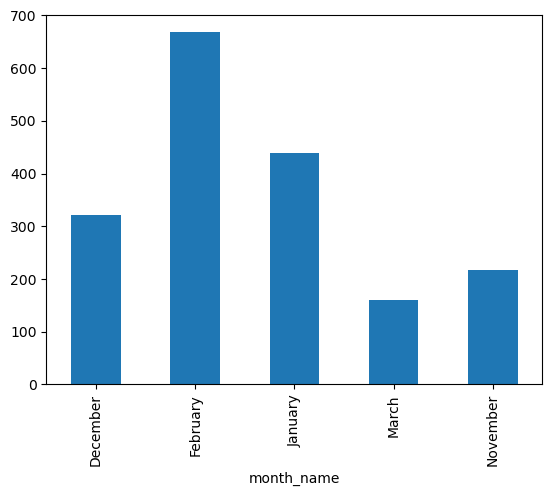

In [90]:
df['month_name']=df['Date'].dt.month_name()
df.groupby('month_name')['INR'].mean().plot(kind='bar')